In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from apyori import apriori
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict
from surprise import SVD
import seaborn as sns

## Deliverable 1::

In [2]:
#Read the data as a dataframe
RecommendationSystems = pd.read_csv('ratings_Electronics.csv')

In [3]:
#Shape of the dataframe 
RecommendationSystems.shape

(7824481, 4)

In [4]:
#Head of the dataframe
RecommendationSystems.head(5)

AKM1MP6P0OYPR  0132793040  5.0  1365811200
0  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
4  A1QGNMC6O1VW39  0511189877  5.0  1397433600

In [5]:
#Columns of the dataframe are missing
colnames = ['userId', 'productId', 'Rating', 'timestamp']
RecommendationSystems = pd.read_csv('ratings_Electronics.csv', names=colnames)

In [6]:
#Head of the dataframe post adding column names
RecommendationSystems.head(5)

userId   productId  Rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200

In [7]:
#Removing timestamp from the dataframe as it will not add value to the model
RecommendationSystems = RecommendationSystems.drop(labels = "timestamp", axis = 1)

In [8]:
#Head of the dataframe post removing 'timestamp' column 
RecommendationSystems.head(5)

userId   productId  Rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0

## Univariate/Histogram Analysis

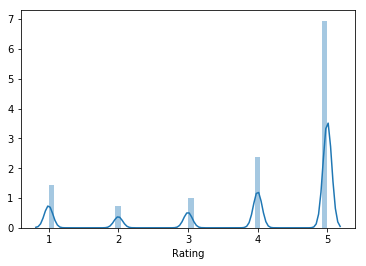

In [9]:
#Histogram for 'Rating' column
sns.distplot(RecommendationSystems['Rating'])

### Histogram analysis of productId and userId takes long time and will not provide much value to the recommendation systems

In [10]:
RecommendationSystems.groupby('productId')['Rating'].mean().head()

productId
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: Rating, dtype: float64

In [11]:
RecommendationSystems.groupby('userId')['Rating'].mean().head()

userId
A00000262KYZUE4J55XGL    5.0
A000063614T1OE0BUSKUT    5.0
A00009182QVLSWIGHLS1B    5.0
A00009661LC9LQPGKJ24G    5.0
A00010809P09NUU6ZP6H     5.0
Name: Rating, dtype: float64

## Deliverable 2::

In [12]:
RecommendationSystems_MultipleRatings = pd.DataFrame(RecommendationSystems.groupby('userId')['Rating'].count()) 

In [13]:
RecommendationSystems_MultipleRatings.shape

(4201696, 1)

In [14]:
RecommendationSystems_MultipleRatings.columns

Index(['Rating'], dtype='object')

In [15]:
RecommendationSystems_UserIdsWithMoreThan50Ratings = RecommendationSystems_MultipleRatings[RecommendationSystems_MultipleRatings['Rating']>=50]

In [16]:
RecommendationSystems_UserIdsWithMoreThan50Ratings = RecommendationSystems_UserIdsWithMoreThan50Ratings.drop(labels = "Rating", axis = 1)

In [17]:
RecommendationSystems_subSet = RecommendationSystems.head(1)

In [18]:
RecommendationSystems_subSet

userId   productId  Rating
0  AKM1MP6P0OYPR  0132793040     5.0

In [19]:
RecommendationSystems_subSet.drop(0,axis=0,inplace=True)

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
RecommendationSystems_UserIdsWithMoreThan50Ratings.shape

(1540, 0)

In [21]:
for x in range(1540):
    RecommendationSystems_subSet = RecommendationSystems_subSet.append(RecommendationSystems[RecommendationSystems['userId'] == RecommendationSystems_UserIdsWithMoreThan50Ratings.index[x]], ignore_index=True)
                                

In [22]:
RecommendationSystems_subSet.shape

(125871, 3)

In [23]:
RecommendationSystems.shape

(7824482, 3)

In [24]:
RecommendationSystems_MultipleRatings[RecommendationSystems_MultipleRatings['Rating']>=50].sum()

Rating    125871
dtype: int64

In [25]:
RecommendationSystems_subSet.head(5)

userId   productId  Rating
0  A100UD67AHFODS  B00004Z5M1     5.0
1  A100UD67AHFODS  B00005T3X7     5.0
2  A100UD67AHFODS  B000069EUW     5.0
3  A100UD67AHFODS  B000069JWX     1.0
4  A100UD67AHFODS  B0000AR0I4     5.0

In [26]:
RecommendationSystems_subSet.tail(5)

userId   productId  Rating
125866  AZOK5STV85FBJ  B00AANMVNQ     5.0
125867  AZOK5STV85FBJ  B00B25P27S     4.0
125868  AZOK5STV85FBJ  B00BF6HVG4     5.0
125869  AZOK5STV85FBJ  B00FB2XNCE     5.0
125870  AZOK5STV85FBJ  B00JG5VV9O     4.0

## Deliverable 3-7::

## User-User Based Collaborative Filtering

In [27]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(RecommendationSystems_subSet[['userId', 'productId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=.30)

In [28]:
RecommendationSystems_subSet.dtypes

userId        object
productId     object
Rating       float64
dtype: object

In [29]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [30]:
trainset.ur

defaultdict(list,
            {0: [(0, 3.0),
              (60, 5.0),
              (2158, 4.0),
              (2220, 5.0),
              (3351, 4.0),
              (10492, 4.0),
              (12551, 5.0),
              (14247, 4.0),
              (15171, 5.0),
              (18196, 5.0),
              (18525, 5.0),
              (20091, 5.0),
              (20640, 5.0),
              (13755, 5.0),
              (18385, 5.0),
              (17480, 5.0),
              (6772, 5.0),
              (23974, 5.0),
              (18065, 5.0),
              (25662, 1.0),
              (22432, 5.0),
              (27434, 5.0),
              (9706, 5.0),
              (408, 5.0),
              (29285, 5.0),
              (2970, 5.0),
              (31328, 5.0),
              (7070, 5.0),
              (32172, 5.0),
              (14140, 5.0),
              (2641, 5.0),
              (33839, 5.0),
              (7943, 5.0),
              (435, 5.0),
              (16522, 5.0)],
             1: [(

In [31]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [32]:
test_pred

[Prediction(uid='A377LPVLLAI42D', iid='B0002XQJFA', r_ui=5.0, est=3.491228070175439, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2CWIYIETNBAK3', iid='B001NEK2GE', r_ui=4.0, est=4.8993993993994, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1U5NWJOYH2QQH', iid='B00130637A', r_ui=5.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3CMO216CWOF5N', iid='B0054X8C1M', r_ui=2.0, est=4.161290322580645, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3W4D8XOGLWUN5', iid='B00005T3V8', r_ui=3.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2LEIANN1UZTHP', iid='B00457C9RQ', r_ui=5.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B002HQWLM0', r_ui=3.0, est=4.2635258600143, details={'was_impossible': True, 'r

In [33]:
def get_top_n(test_pred, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [34]:
top_n = get_top_n(test_pred, n=5)

In [35]:
top_n

defaultdict(list,
            {'A377LPVLLAI42D': [('B0016KLL2Y', 4.2635258600143),
              ('B000FL3HHC', 4.2635258600143),
              ('B000F6UKTU', 4.2635258600143),
              ('B00004Z75E', 4.2635258600143),
              ('B005EVVHOS', 4.2635258600143)],
             'A2CWIYIETNBAK3': [('B00J9D4LJA', 5),
              ('B001O5CCQK', 5),
              ('B009E6J8U4', 5),
              ('B00EO302SO', 5),
              ('B00E3RH5W2', 5)],
             'A1U5NWJOYH2QQH': [('B00130637A', 4.2635258600143),
              ('B002E3AIG2', 4.2635258600143),
              ('B0000DZFVK', 4.2635258600143),
              ('B006XGCQ2U', 4.2635258600143),
              ('B0008G1RSU', 4.2635258600143)],
             'A3CMO216CWOF5N': [('B000AM8CLW', 4.2635258600143),
              ('B0000AMK36', 4.2635258600143),
              ('B0042TFXZM', 4.2635258600143),
              ('B00012K2S2', 4.2635258600143),
              ('B0013FZ326', 4.2635258600143)],
             'A3W4D8XOGLWUN5': [('B0

In [36]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A377LPVLLAI42D ['B0016KLL2Y', 'B000FL3HHC', 'B000F6UKTU', 'B00004Z75E', 'B005EVVHOS']
A2CWIYIETNBAK3 ['B00J9D4LJA', 'B001O5CCQK', 'B009E6J8U4', 'B00EO302SO', 'B00E3RH5W2']
A1U5NWJOYH2QQH ['B00130637A', 'B002E3AIG2', 'B0000DZFVK', 'B006XGCQ2U', 'B0008G1RSU']
A3CMO216CWOF5N ['B000AM8CLW', 'B0000AMK36', 'B0042TFXZM', 'B00012K2S2', 'B0013FZ326']
A3W4D8XOGLWUN5 ['B000HVVO98', 'B000M17AVO', 'B0002ZAILY', 'B00DQKQ7U8', 'B007PJ4P4G']
A2LEIANN1UZTHP ['B00457C9RQ', 'B00915HZYE', 'B00G0O79IQ', 'B006V9AUMC', 'B005V232E8']
A6VXZ1EEPRTLV ['B00006HCCK', 'B00123WZWK', 'B000M00M2E', 'B005IA843W', 'B0015AE4CE']
A1PEXTGNF36I1Q ['B003O1UYHG', 'B005BI5WMW', 'B0045TYDNC', 'B0058XGN7I', 'B00454YCWY']
A3SOJO7Z7R9WIA ['B00007E7JU', 'B0058LL3OI', 'B005341PFW', 'B000KURO9K', 'B004ETSGG8']
A1NZLRAZJGD99W ['B004M8ST36', 'B0015HQLIC', 'B001W2ENVM', 'B000I3DTCA', 'B00865MZKY']
A1OMXVXXP07F05 ['B00067LYFW', 'B005D5M136', 'B00070QI1I', 'B0000ULGOE', 'B000BYLGV2']
A3ER6ARJ23CIN8 ['B003ES5ZSW', 'B002ZCXJZE', 'B0034XRDUA

In [37]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0615


1.0614899531754747

## Item-Item Based Collaborative Filtering

In [38]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(RecommendationSystems_subSet[['userId', 'productId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=.30)

In [39]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [40]:
test_pred

[Prediction(uid='A377LPVLLAI42D', iid='B0002XQJFA', r_ui=5.0, est=3.491228070175439, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2CWIYIETNBAK3', iid='B001NEK2GE', r_ui=4.0, est=4.8993993993994, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1U5NWJOYH2QQH', iid='B00130637A', r_ui=5.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3CMO216CWOF5N', iid='B0054X8C1M', r_ui=2.0, est=4.161290322580645, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3W4D8XOGLWUN5', iid='B00005T3V8', r_ui=3.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2LEIANN1UZTHP', iid='B00457C9RQ', r_ui=5.0, est=4.2635258600143, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B002HQWLM0', r_ui=3.0, est=4.2635258600143, details={'was_impossible': True, 'r

In [41]:
def get_top_n(test_pred, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [42]:
top_n = get_top_n(test_pred, n=5)

In [43]:
top_n

defaultdict(list,
            {'A377LPVLLAI42D': [('B0016KLL2Y', 4.2635258600143),
              ('B000FL3HHC', 4.2635258600143),
              ('B000F6UKTU', 4.2635258600143),
              ('B00004Z75E', 4.2635258600143),
              ('B005EVVHOS', 4.2635258600143)],
             'A2CWIYIETNBAK3': [('B00J9D4LJA', 5),
              ('B001O5CCQK', 5),
              ('B009E6J8U4', 5),
              ('B00EO302SO', 5),
              ('B00E3RH5W2', 5)],
             'A1U5NWJOYH2QQH': [('B00130637A', 4.2635258600143),
              ('B002E3AIG2', 4.2635258600143),
              ('B0000DZFVK', 4.2635258600143),
              ('B006XGCQ2U', 4.2635258600143),
              ('B0008G1RSU', 4.2635258600143)],
             'A3CMO216CWOF5N': [('B000AM8CLW', 4.2635258600143),
              ('B0000AMK36', 4.2635258600143),
              ('B0042TFXZM', 4.2635258600143),
              ('B00012K2S2', 4.2635258600143),
              ('B0013FZ326', 4.2635258600143)],
             'A3W4D8XOGLWUN5': [('B0

In [44]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A377LPVLLAI42D ['B0016KLL2Y', 'B000FL3HHC', 'B000F6UKTU', 'B00004Z75E', 'B005EVVHOS']
A2CWIYIETNBAK3 ['B00J9D4LJA', 'B001O5CCQK', 'B009E6J8U4', 'B00EO302SO', 'B00E3RH5W2']
A1U5NWJOYH2QQH ['B00130637A', 'B002E3AIG2', 'B0000DZFVK', 'B006XGCQ2U', 'B0008G1RSU']
A3CMO216CWOF5N ['B000AM8CLW', 'B0000AMK36', 'B0042TFXZM', 'B00012K2S2', 'B0013FZ326']
A3W4D8XOGLWUN5 ['B000HVVO98', 'B000M17AVO', 'B0002ZAILY', 'B00DQKQ7U8', 'B007PJ4P4G']
A2LEIANN1UZTHP ['B00457C9RQ', 'B00915HZYE', 'B00G0O79IQ', 'B006V9AUMC', 'B005V232E8']
A6VXZ1EEPRTLV ['B00006HCCK', 'B00123WZWK', 'B000M00M2E', 'B005IA843W', 'B0015AE4CE']
A1PEXTGNF36I1Q ['B003O1UYHG', 'B005BI5WMW', 'B0045TYDNC', 'B0058XGN7I', 'B00454YCWY']
A3SOJO7Z7R9WIA ['B00007E7JU', 'B0058LL3OI', 'B005341PFW', 'B000KURO9K', 'B004ETSGG8']
A1NZLRAZJGD99W ['B004M8ST36', 'B0015HQLIC', 'B001W2ENVM', 'B000I3DTCA', 'B00865MZKY']
A1OMXVXXP07F05 ['B00067LYFW', 'B005D5M136', 'B00070QI1I', 'B0000ULGOE', 'B000BYLGV2']
A3ER6ARJ23CIN8 ['B003ES5ZSW', 'B002ZCXJZE', 'B0034XRDUA

In [45]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0615


1.0614899531754747

## SVD/Matrix Factorization

In [46]:
data = Dataset.load_from_df(RecommendationSystems_subSet[['userId', 'productId', 'Rating']], reader)

In [47]:
trainset = data.build_full_trainset()

In [48]:
trainset

In [49]:
trainset.ur

defaultdict(list,
            {0: [(0, 5.0),
              (1, 5.0),
              (2, 5.0),
              (3, 1.0),
              (4, 5.0),
              (5, 5.0),
              (6, 5.0),
              (7, 5.0),
              (8, 5.0),
              (9, 5.0),
              (10, 5.0),
              (11, 5.0),
              (12, 5.0),
              (13, 3.0),
              (14, 5.0),
              (15, 2.0),
              (16, 5.0),
              (17, 5.0),
              (18, 3.0),
              (19, 1.0),
              (20, 5.0),
              (21, 3.0),
              (22, 5.0),
              (23, 5.0),
              (24, 5.0),
              (25, 5.0),
              (26, 5.0),
              (27, 5.0),
              (28, 1.0),
              (29, 5.0),
              (30, 4.0),
              (31, 5.0),
              (32, 3.0),
              (33, 5.0),
              (34, 5.0),
              (35, 4.0),
              (36, 4.0),
              (37, 4.0),
              (38, 5.0),
              

In [50]:
algo = SVD()
algo.fit(trainset)

In [51]:
#Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [52]:
testset

[('A100UD67AHFODS', 'B00002EQCW', 4.26133898991825),
 ('A100UD67AHFODS', 'B00004TDRH', 4.26133898991825),
 ('A100UD67AHFODS', 'B00006BBAC', 4.26133898991825),
 ('A100UD67AHFODS', 'B00006HSYC', 4.26133898991825),
 ('A100UD67AHFODS', 'B00006RVPW', 4.26133898991825),
 ('A100UD67AHFODS', 'B00007CW52', 4.26133898991825),
 ('A100UD67AHFODS', 'B00007CW54', 4.26133898991825),
 ('A100UD67AHFODS', 'B0000AE6G9', 4.26133898991825),
 ('A100UD67AHFODS', 'B00016BYHQ', 4.26133898991825),
 ('A100UD67AHFODS', 'B00016V3VI', 4.26133898991825),
 ('A100UD67AHFODS', 'B0002CPBWI', 4.26133898991825),
 ('A100UD67AHFODS', 'B0002D05RI', 4.26133898991825),
 ('A100UD67AHFODS', 'B0002L5R78', 4.26133898991825),
 ('A100UD67AHFODS', 'B0002LEMWE', 4.26133898991825),
 ('A100UD67AHFODS', 'B0002R5Y5M', 4.26133898991825),
 ('A100UD67AHFODS', 'B00030DEQE', 4.26133898991825),
 ('A100UD67AHFODS', 'B0009YJXMS', 4.26133898991825),
 ('A100UD67AHFODS', 'B000E1HXL4', 4.26133898991825),
 ('A100UD67AHFODS', 'B000EGJTL6', 4.2613389899

In [53]:
predictions = algo.test(testset)

In [54]:
predictions

[Prediction(uid='A100UD67AHFODS', iid='B00002EQCW', r_ui=4.26133898991825, est=4.644997183193617, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00004TDRH', r_ui=4.26133898991825, est=4.74867546653103, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00006BBAC', r_ui=4.26133898991825, est=4.568193564189332, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00006HSYC', r_ui=4.26133898991825, est=4.758103520306946, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00006RVPW', r_ui=4.26133898991825, est=4.9946572251991705, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00007CW52', r_ui=4.26133898991825, est=4.565831645458515, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B00007CW54', r_ui=4.26133898991825, est=4.7811955248334925, details={'was_impossible': False}),
 Prediction(uid='A100UD67AHFODS', iid='B0000AE6G9', r_ui=4.26

In [55]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [56]:
top_n = get_top_n(predictions, n=5)

In [57]:
top_n

defaultdict(list,
            {'A100UD67AHFODS': [('B00434OWDA', 5),
              ('B000N99BBC', 5),
              ('B00029U1DK', 5),
              ('B0019EHU8G', 5),
              ('B002V88HFE', 5)],
             'A100WO06OQR8BQ': [('B000RZQZM0', 4.7645698005228265),
              ('B0088PUEPK', 4.7139141962517614),
              ('B00829TIEK', 4.707776360934075),
              ('B0058J1QYC', 4.690289760644996),
              ('B0093HGD2K', 4.689900423441244)],
             'A105S56ODHGJEK': [('B0052SCU8U', 4.875256719740169),
              ('B005LDLP8W', 4.767864939303272),
              ('B001TH7GUU', 4.76405307240818),
              ('B000F7QRTG', 4.752584270164256),
              ('B00BW6KCTU', 4.727089050783134)],
             'A105TOJ6LTVMBG': [('B004ELA0SS', 4.748669675091314),
              ('B0045KGZOG', 4.747987612125079),
              ('B00BQ4F9ZA', 4.73130716976934),
              ('B00L3YHF6O', 4.704557668430736),
              ('B0096W1P6G', 4.6945330503384906)],
     

In [58]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A100UD67AHFODS ['B00434OWDA', 'B000N99BBC', 'B00029U1DK', 'B0019EHU8G', 'B002V88HFE']
A100WO06OQR8BQ ['B000RZQZM0', 'B0088PUEPK', 'B00829TIEK', 'B0058J1QYC', 'B0093HGD2K']
A105S56ODHGJEK ['B0052SCU8U', 'B005LDLP8W', 'B001TH7GUU', 'B000F7QRTG', 'B00BW6KCTU']
A105TOJ6LTVMBG ['B004ELA0SS', 'B0045KGZOG', 'B00BQ4F9ZA', 'B00L3YHF6O', 'B0096W1P6G']
A10AFVU66A79Y1 ['B001UI2FPE', 'B00D6XW62I', 'B0000BZL5A', 'B001FA09WI', 'B000BQ7GW8']
A10H24TDLK2VDP ['B005OA3BSY', 'B002VPE1X4', 'B003ES5ZUU', 'B00IVFDZBC', 'B00029U1DK']
A10NMELR4KX0J6 ['B008EQZ25K', 'B0052SCU8U', 'B000M2TAN4', 'B001TH7GUA', 'B001UI2FPE']
A10O7THJ2O20AG ['B00004Z5M1', 'B000069EUW', 'B000233WJ6', 'B0002SQ2P2', 'B000H0K8VY']
A10PEXB6XAQ5XF ['B00B4GGW5Q', 'B00029U1DK', 'B0017H4G0A', 'B001UI2FPE', 'B008HK50ZA']
A10X9ME6R66JDX ['B0002SQ2P2', 'B005PQTYHE', 'B0002LEMWE', 'B000HPV3RW', 'B003ES5ZUU']
A10Y058K7B96C6 ['B000233WJ6', 'B000VX6XL6', 'B003ES5ZUU', 'B00829TIA4', 'B00IVFDZBC']
A10ZBR6O8S8OCY ['B0002SQ2P2', 'B000LRMS66', 'B002Y6CJJ

In [59]:
# get RMSE
print("SVD/Matrix Factorization : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD/Matrix Factorization : Test Set
RMSE: 0.4103


0.4102637509202915

## Building Popularity Recommender Systems

In [60]:
RecommendationSystems_subSet.groupby('productId')['Rating'].mean().head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: Rating, dtype: float64

In [61]:
RecommendationSystems_subSet.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: Rating, dtype: float64

In [62]:
RecommendationSystems_subSet.groupby('productId')['Rating'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: Rating, dtype: int64

In [63]:
PopularityRecommendationSystems = pd.DataFrame(RecommendationSystems_subSet.groupby('productId')['Rating'].mean().sort_values(ascending=False)) 

In [64]:
PopularityRecommendationSystems.head(5)

Rating
productId         
B00LKG1MC8     5.0
B002QUZM3M     5.0
B002QWNZHU     5.0
B002QXZPFE     5.0
B002R0DWNS     5.0

In [65]:
PopularityRecommendationSystems['RatingCount'] = pd.DataFrame(RecommendationSystems_subSet.groupby('productId')['Rating'].count().sort_values(ascending=False))

In [66]:
PopularityRecommendationSystems.head(5)

Rating  RatingCount
productId                      
B00LKG1MC8     5.0            1
B002QUZM3M     5.0            1
B002QWNZHU     5.0            1
B002QXZPFE     5.0            3
B002R0DWNS     5.0            1

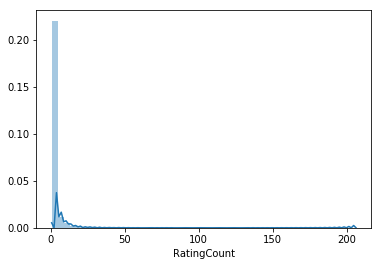

In [68]:
sns.distplot(PopularityRecommendationSystems['RatingCount'])

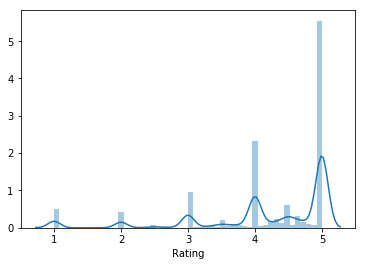

In [69]:
sns.distplot(PopularityRecommendationSystems['Rating'])

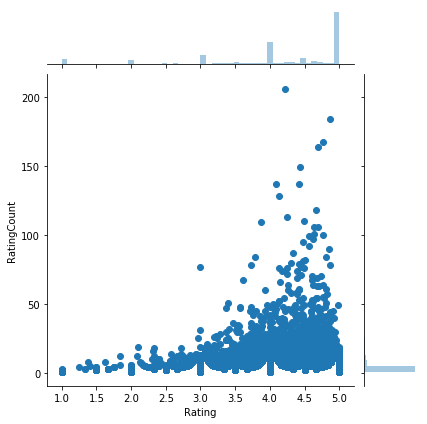

In [70]:
sns.jointplot(x='Rating', y='RatingCount', data=PopularityRecommendationSystems)

## Deliverable 8::
1. The data set has been made less dense by creating a separate dataframe where the users have given ratings for more than 50 products
2. Running the data set as a whole created memory issue because of the machine configurations
3. Histogram analysis didnt give much information on the ProductId and UserId columns however, Histogram analysis of Rating gave the range of rating from 1-5 
4. Recommendation Systems model have been built for Popularity and Collaborative filtering based recommendation systems
5. Collaborative filtering based recommendation systems have been built using item-item, user-user and SVD/Matrix factorization methods
6. RMSE score of 1.06 has been observed for both user-user and item-item based collaborative filtering and RMSE score of 0.41 has been observed for SVD/Matrix factorization method of Collaborative filtering
7. Top 5 product recommendations (productIds) have been given for all the users (userId) for all the 3 collaborative filtering based models
8. Collaborative filtering based on SVD/Matrix factorization yielded better results in terms of RMSE score and no 'was_impossible'=True observed
9. Since the popularity based model is a generalized model, the dataset is not trained by algorithms/model hence there is no measure of RMSE or other accuracy scores.
10. Top 5 Product suggestions have been listed for the popularity based recommender systems followed by visualizations of the derived metrics.